# Data Scraping Project

## Introduction

The Data Scraping Project analyzes the top movies on IMDb using web scraping techniques in Python. The libraries 'Requests', 'BeautifulSoup', and 'pandas' were utilized to clean the data and organize the information into an easy-to-read format.

The following project demonstrates the implementation of these skills:
* HTML and JSON Parsing
* Data Cleaning and Preprocessing
* Data analysis and visualization using Pandas and Matplotlib.
* Interpreting Results from Insights

## Project Setup

In [1]:
# Dependencies
!pip install requests html5lib bs4

# Imports
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Web Scraping the Top Movies from IMDb (https://www.imdb.com/chart/top).

The following information was collected:
- Title
- Release Year
- Genre(s)
- Runtime
- IMDb Rating
- Age Rating

In [2]:
def scrape_imdb_top_movies(url="https://www.imdb.com/chart/top"):
  headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36", "Accept-Language": "en-US,en;q=0.5"}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, "html.parser")

  movies = soup.select("li.ipc-metadata-list-summary-item")
  script_tag = soup.find("script", type="application/ld+json")
  json_data = json.loads(script_tag.string)
  json_movies = json_data.get("itemListElement", [])

  movie_data = []

  for i, movie in enumerate(movies[:250]):
      # Collects HTML data
      title = movie.select_one("h3").get_text(strip=True)
      metadata_items = movie.select(".cli-title-metadata-item")
      release_year = metadata_items[0].get_text(strip=True)
      runtime = metadata_items[1].get_text(strip=True)
      age_rating = metadata_items[2].get_text(strip=True)
      rating_items = movie.select(".ipc-rating-star--rating")
      rating = rating_items[0].get_text(strip=True)

      # Collects JSON data
      genre = json_movies[i]["item"].get("genre")

      movie_data.append({
          "Title": title,
          "Release Year": release_year,
          "Genres": genre,
          "Runtime": runtime,
          "Rating": rating,
          "Age Rating": age_rating
      })

  return pd.DataFrame(movie_data)

In [3]:
movies_df = scrape_imdb_top_movies()

In [4]:
print("Number of movies:", len(movies_df))

Number of movies: 25


In [5]:
movies_df

,Title,Release Year,Genres,Runtime,Rating,Age Rating
0,1. The Shawshank Redemption,1994,Drama,2h 22m,9.3,R
1,2. The Godfather,1972,"Crime, Drama",2h 55m,9.2,R
2,3. The Dark Knight,2008,"Action, Crime, Drama",2h 32m,9.1,PG-13
3,4. The Godfather Part II,1974,"Crime, Drama",3h 22m,9.0,R
4,5. 12 Angry Men,1957,"Crime, Drama",1h 36m,9.0,Approved
5,6. The Lord of the Rings: The Return of the King,2003,"Adventure, Drama, Fantasy",3h 21m,9.0,PG-13
6,7. Schindler's List,1993,"Biography, Drama, History",3h 15m,9.0,R
7,8. Pulp Fiction,1994,"Crime, Drama",2h 34m,8.8,R
8,9. The Lord of the Rings: The Fellowship of th...,2001,"Adventure, Drama, Fantasy",2h 58m,8.9,PG-13
9,"10. The Good, the Bad and the Ugly",1966,"Adventure, Drama, Western",2h 58m,8.8,R


In [6]:
movies_df.to_csv("uncleaned_imdb.csv", index=False)

In [7]:
from google.colab import files
files.download("uncleaned_imdb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cleaning Data

To prepare the dataset, the following transformations were applied:
* Removed numbering from titles (e.g., Shawshank Redemption")
* Converted "Release Year" and "Runtime" to integer values.
* Converted "Rating" to a float.
* Ensured that the "Age Rating" adheres to the Motion Picture Association's film rating system.

In [8]:
# Convert data types
movies_df["Release Year"] = movies_df["Release Year"].astype(int)
movies_df["Rating"] = movies_df["Rating"].astype(float)

In [9]:
# Removes extraneous numbering from movie titles
def remove_numbering(title):
    return title.split(".")[1].strip()

In [10]:
# Convert runtime into minutes for easier analysis
def parse_runtime(runtime_str):
    parts = runtime_str.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h','')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m',''))
    return total_minutes

In [11]:
movies_df["Runtime"] = movies_df["Runtime"].apply(parse_runtime)
movies_df["Title"] = movies_df["Title"].apply(remove_numbering)

In [12]:
movies_df.head(25)

,Title,Release Year,Genres,Runtime,Rating,Age Rating
0,The Shawshank Redemption,1994,Drama,142,9.3,R
1,The Godfather,1972,"Crime, Drama",175,9.2,R
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.1,PG-13
3,The Godfather Part II,1974,"Crime, Drama",202,9.0,R
4,12 Angry Men,1957,"Crime, Drama",96,9.0,Approved
5,The Lord of the Rings: The Return of the King,2003,"Adventure, Drama, Fantasy",201,9.0,PG-13
6,Schindler's List,1993,"Biography, Drama, History",195,9.0,R
7,Pulp Fiction,1994,"Crime, Drama",154,8.8,R
8,The Lord of the Rings: The Fellowship of the Ring,2001,"Adventure, Drama, Fantasy",178,8.9,PG-13
9,"The Good, the Bad and the Ugly",1966,"Adventure, Drama, Western",178,8.8,R


## Data Analysis and Visualizations

### Data Analysis

In [13]:
print("Average IMDb Rating (Top 25 Movies):", round(movies_df["Rating"].mean(), 2))
print("Median IMDb Rating (Top 25 Movies):", round(movies_df["Rating"].median(), 2))
print("Minimum IMDb Rating (Top 25 Movies):", movies_df["Rating"].min())
print("Maximum IMDb Rating (Top 25 Movies):", movies_df["Rating"].max())
print("Release Years Range: ", movies_df["Release Year"].min(), "to", movies_df["Release Year"].max())
print("Longest Movie: ", movies_df["Runtime"].max(), "minutes")
print("Shortest Movie: ", movies_df["Runtime"].min(), "minutes")

Average IMDb Rating (Top 25 Movies): 8.82
Median IMDb Rating (Top 25 Movies): 8.8
Minimum IMDb Rating (Top 25 Movies): 8.6
Maximum IMDb Rating (Top 25 Movies): 9.3
Release Years Range:  1946 to 2014
Longest Movie:  207 minutes
Shortest Movie:  96 minutes


In [14]:
age_rating_mean_ratings = movies_df.groupby("Age Rating")["Rating"].mean()
print("Mean Rating by Age Rating:\n")
print(age_rating_mean_ratings)

Mean Rating by Age Rating:

Age Rating
Approved     9.000000
Not Rated    8.600000
PG           8.650000
PG-13        8.871429
R            8.814286
Name: Rating, dtype: float64


### Data Visualizations (for the top 25 movies)

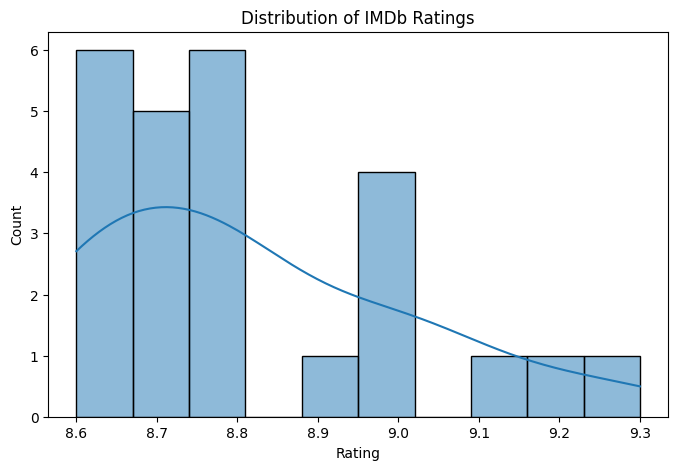

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(movies_df["Rating"], bins=10, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

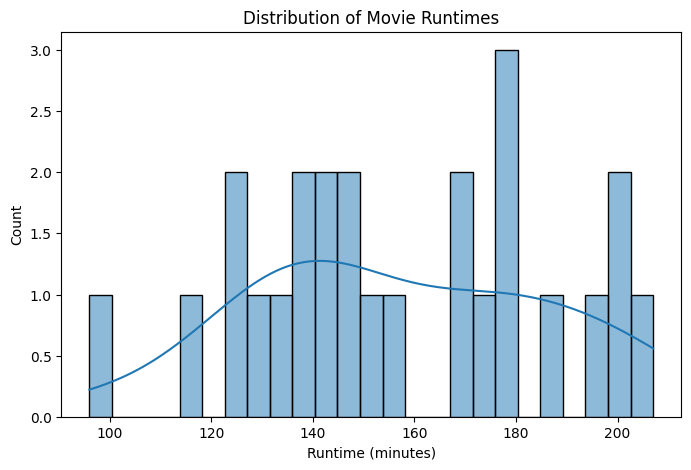

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(movies_df["Runtime"], bins=25, kde=True)
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.show()

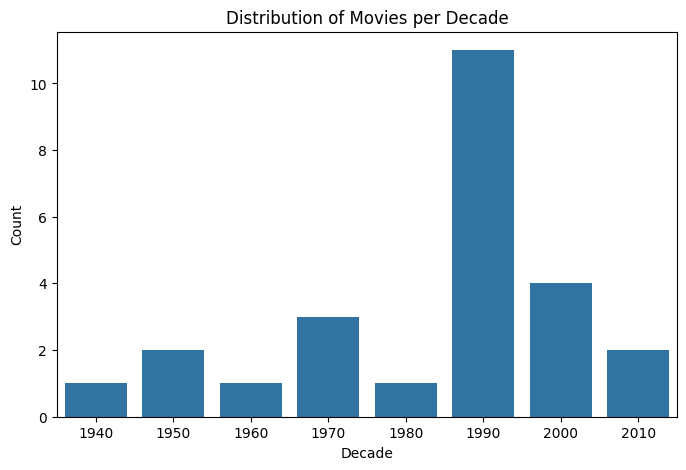

In [17]:
movies_df["Decade"] = (movies_df["Release Year"] // 10) * 10
decade_counts = movies_df["Decade"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.title("Distribution of Movies per Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.show()

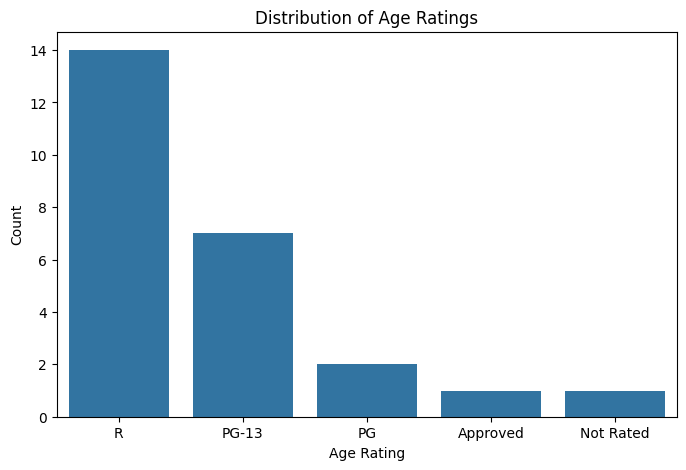

In [18]:
age_rating_counts = movies_df["Age Rating"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=age_rating_counts.index, y=age_rating_counts.values)
plt.title("Distribution of Age Ratings")
plt.xlabel("Age Rating")
plt.ylabel("Count")
plt.show()

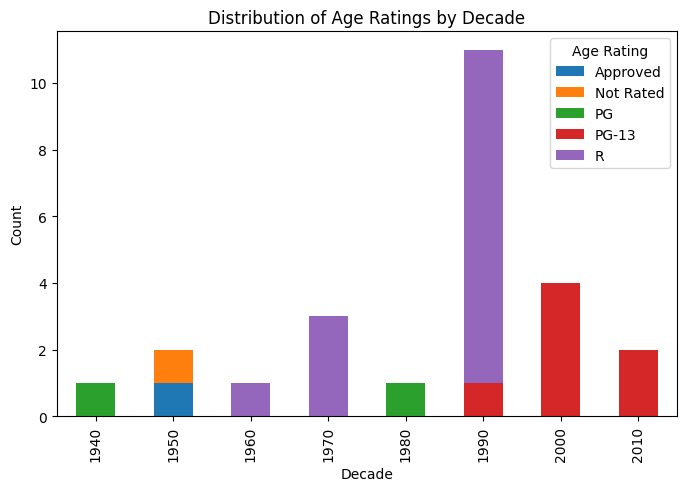

In [19]:
age_rating_counts = movies_df.groupby(["Decade", "Age Rating"]).size().unstack(fill_value=0)

age_rating_counts.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Distribution of Age Ratings by Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.show()

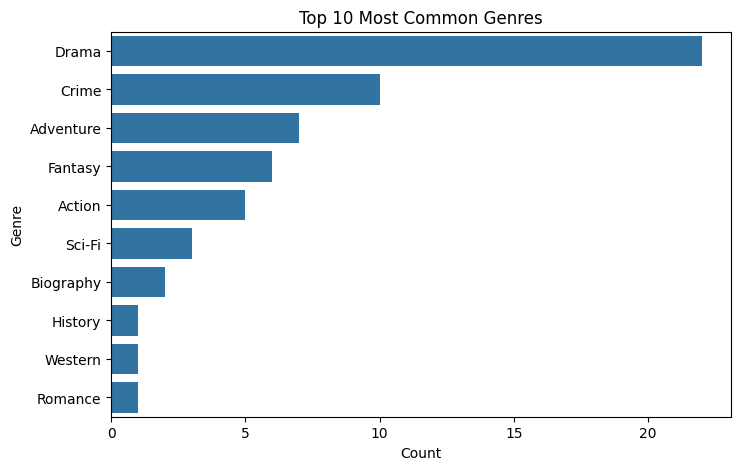

In [20]:
all_genres = []
for g in movies_df["Genres"]:
    if isinstance(g, list):
        all_genres.extend(g)
    else:
        all_genres.extend([genre.strip() for genre in g.split(",")])

genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=["Genre", "Count"])

plt.figure(figsize=(8,5))
sns.barplot(x="Count", y="Genre", data=top_genres)
plt.title("Top 10 Most Common Genres")
plt.show()

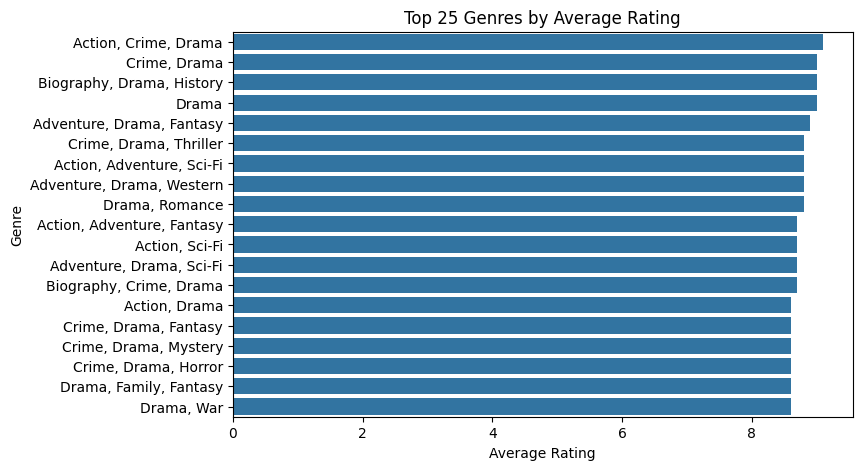

In [21]:
genre_ratings = movies_df.explode("Genres").groupby("Genres")["Rating"].mean().reset_index()
genre_ratings = genre_ratings.sort_values(by="Rating", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Rating", y="Genres", data=genre_ratings.head(25))
plt.title("Top 25 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

Text(0, 0.5, 'Rating')

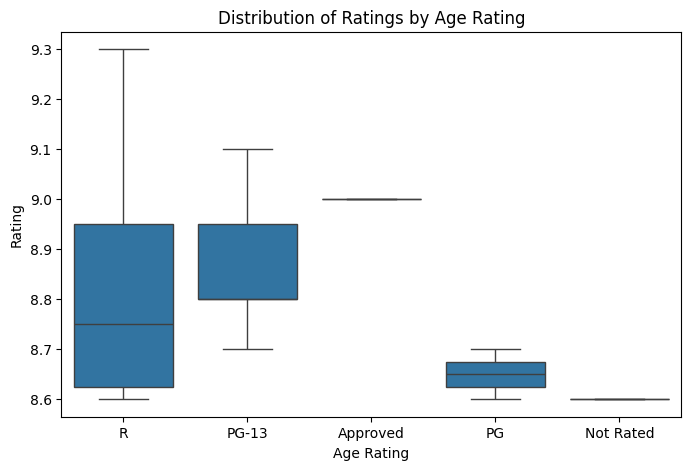

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Age Rating", y="Rating", data=movies_df)
plt.title("Distribution of Ratings by Age Rating")
plt.xlabel("Age Rating")
plt.ylabel("Rating")

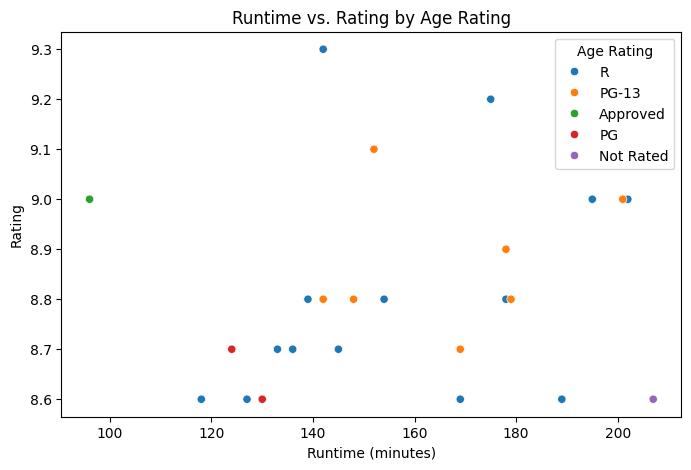

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Runtime", y="Rating", hue="Age Rating", data=movies_df)
plt.title("Runtime vs. Rating by Age Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.show()

## Insights

* The most common genre throughout the decades has been drama.
* Most of the top movies were released in the 1990s.
* R-rated movies have the highest occurrence, but PG-13 movies have a slightly higher average rating.

## Limitations

### Issues

* The web scraping algorithm only permits scraping the top 25 movies, rather than the top 250.
  * The website initially loads website loads the top movies and movies, then dynamically updates the as when the user scrolls down.
* Age ratings vary across different countries, which significantly affects the results.

### Future Improvements

* Scrape box office data to analyze and predict profitability.
* Include directors, main actors, and producers to assess their impact on profit and critical acclaim.
* Scrape results from other review sites (e.g., Metacritic and Rotten Tomatoes).

## Conclusion

* Despite its limitations, this project successfully scraped and analyzed the top 25 movies from IMDb using Python. Cleaning and standardizing the dataset revealed that dramas, PG-13 and R-rated films, and movies from the 1990s are the most strongly represented. All top 25 films had ratings of 8.6 or higher, suggesting a potential cutoff point for films to be included on the list.

* In summary, audience and critic preferences tend to favor dramas and R-rated movies. New viewers looking to start watching films can use this list as a guide to identify movies that are generally considered "good". Additionally, companies can leverage this information to refine recommendation systems and develop business strategies, enabling more informed decisions during the pre-production and financial planning phases.
  * Since the audience's preferences are well established, recommendation systems can be optimized to enhance engagement and improve retention.
  * Streaming services can focus on critically acclaimed critically-acclaimed movies and to build a diverse a catalogue.
  * Production can focus on specific genres and rating categories that have been proven to success.



## Important Notes

* Most movies have multiple genres, so it is important not to create movies that are exclusively dramas.

* Do not draw conclusions that R-rated movies are better than PG-13 and lower-rated movies, especially since the age rating system is not universally followed.

* Ratings do not necessarily reflect quality, as user-driven reviews are not "objective" and may sometimes reflect biases towards certain genres.
* Even though these movies are considered the "best of the best, not every "best movie" will have a rating higher than 8.6.

* Do not immediately assume that dramas, PG-13, and R-rated films will cause higher ratings, as other variables like directors, actors, and marketing may be causal factors.
  * In other words, correlations do not imply causation, but they do not immediately rule out the possibility.

**The following results should be interpreted responsibly to prevent misleading directions and instead be used to open opportunities for further analysis; hence, the suggestion to review other review sites.**

## Save to CSV

In [24]:
movies_df.to_csv("cleaned_imdb.csv", index=False)

In [25]:
from google.colab import files
files.download("cleaned_imdb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>